In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
#load data
df=pd.read_csv('Wine.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
X=df.drop(columns=['Customer_Segment'])
y=df['Customer_Segment']

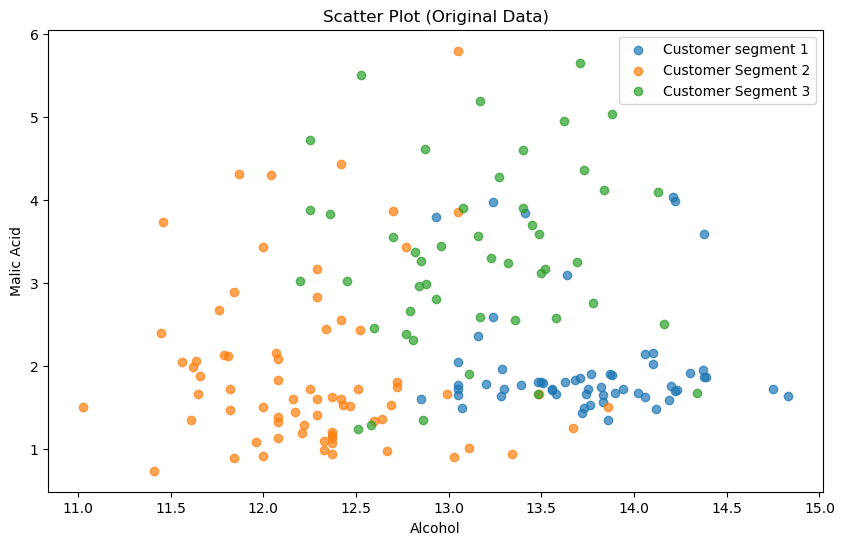

In [8]:
#scatterplot before pca
plt.figure(figsize=(10,6))
plt.scatter(X[y==1]['Alcohol'],X[y==1]['Malic_Acid'],label='Customer segment 1',alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()

In [9]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Create a new DataFrame with the first two principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y

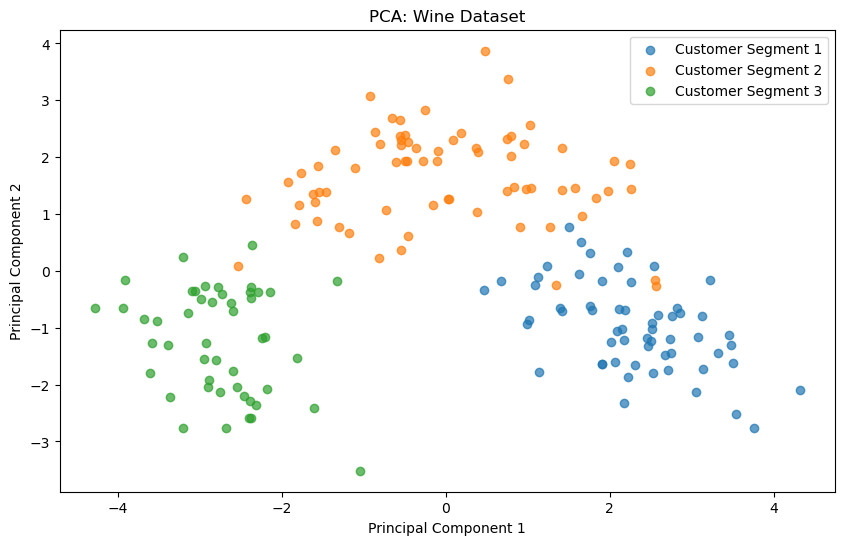

In [12]:
# Visualize the data using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 1]['Principal Component 2'], label='Customer Segment 1', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 2]['Principal Component 2'], label='Customer Segment 2', alpha=0.7)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 1'], pca_df[pca_df['Customer_Segment'] == 3]['Principal Component 2'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Wine Dataset')
plt.show()